# Takehome for springboard "Relax"

## Intro

This is my working notebook for a Springboard practice takehome.  The company is called "Relax".

## Set up

In [1]:
# Import key libraries and set some defaults
import numpy as np
import pandas as pd

## Import other libraries
import datetime
import chardet

# Import graphing libraries
import matplotlib.pyplot as plt
import matplotlib.style as style # Do I use?
import seaborn as sns

# Set some Seaborn defaults
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('muted')


# Import models
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

## Load user engagement

In [2]:
user_engagement_raw = pd.read_csv('data_raw_takehome_user_engagement.csv')

## Assess user engagement

In [3]:
user_engagement_raw.shape

(207917, 3)

In [4]:
user_engagement_raw.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
user_engagement_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
user_engagement_raw.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


## Explore user engagement 

In [7]:
print('There are {} unique users'.format(len(user_engagement_raw.user_id.unique())))
print('The first visit by any users is on {}'.format(user_engagement_raw.time_stamp.min()))
print('The last visit by any users is on {}'.format(user_engagement_raw.time_stamp.max()))

There are 8823 unique users
The first visit by any users is on 2012-05-31 08:20:06
The last visit by any users is on 2014-06-06 14:58:50


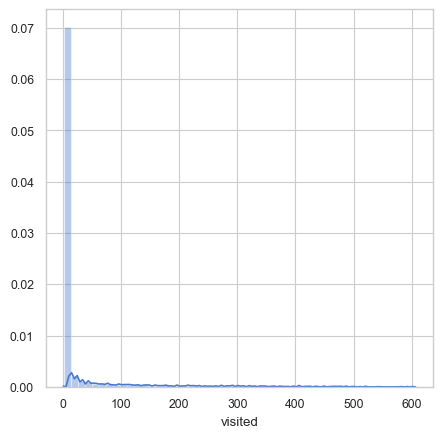

In [8]:
# Look at the distribution of visits per user
user_by_vists = user_engagement_raw.groupby('user_id')['visited'].sum()
g = plt.figure(figsize=(5, 5), dpi=100)
g = sns.distplot(user_by_vists)

## Calculate adopted user

My game plan is to:

* Build a data frame that includes users and all of their visits
* Loop thru by user, calc whether the user was adopted and create an adopted dataframe

In [9]:
# Create new table
user_adop_temp = user_engagement_raw.copy()
user_adop_temp.drop(['visited'], axis=1, inplace=True)

# Create a column lable of 'visit_no' to make the pivot a bit easier
user_adop_temp['visit_order'] = user_adop_temp['time_stamp'].rank(method='dense') # Getting a numeric to rank within groupby
user_adop_temp.sort_values(by='time_stamp')
user_adop_temp['visit_no'] = user_adop_temp.groupby('user_id')['visit_order'].rank(method='dense')
user_adop_temp.drop(['visit_order'], axis=1, inplace=True)

# Creating a table of visit by user
visit_by_user = user_adop_temp.pivot(index='visit_no', columns='user_id', values='time_stamp')

In [10]:
visit_by_user.head(5)

user_id,1,2,3,4,5,6,7,10,11,13,...,11989,11990,11991,11992,11995,11996,11997,11998,11999,12000
visit_no,,,,,,,,,,,,,,,,,,,,,
1.0,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-03-19 23:14:52,2013-05-22 08:09:28,2013-01-22 10:14:20,2013-12-19 03:37:06,2012-12-20 13:24:32,2013-01-16 22:08:03,2013-12-27 03:55:54,2014-03-30 16:19:38,...,2013-09-07 11:24:33,2013-07-06 21:00:48,2014-04-20 14:22:45,2014-04-11 19:39:56,2013-10-22 13:33:17,2013-09-06 06:14:15,2013-01-15 18:28:37,2014-04-27 12:45:16,2012-06-02 11:55:59,2014-01-26 08:57:12
2.0,NaN,2013-11-29 03:45:04,NaN,NaN,NaN,NaN,NaN,2013-01-22 22:08:03,NaN,NaN,...,NaN,NaN,2014-04-25 14:22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,2013-12-09 03:45:04,NaN,NaN,NaN,NaN,NaN,2013-01-30 22:08:03,NaN,NaN,...,NaN,NaN,2014-04-28 14:22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,2013-12-25 03:45:04,NaN,NaN,NaN,NaN,NaN,2013-02-04 22:08:03,NaN,NaN,...,NaN,NaN,2014-05-17 14:22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,2013-12-31 03:45:04,NaN,NaN,NaN,NaN,NaN,2013-02-06 22:08:03,NaN,NaN,...,NaN,NaN,2014-05-30 14:22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Set up prior to loops
visits_max = visit_by_user.shape[0]
users_max = visit_by_user.shape[1]
adop_window = datetime.timedelta(days=7)
user_adop_ls = []

# Loop thru the dataframe
for user_no in range(users_max):
    is_adopted = False
    for visit_no in range(2, visits_max):
        current_visit = visit_by_user.iloc[visit_no, user_no]
        prior_visit = visit_by_user.iloc[(visit_no - 2), user_no]  
        if pd.isnull(current_visit):
            break
        diff = (pd.to_datetime(current_visit) - pd.to_datetime(prior_visit))
        if diff <= adop_window:
            is_adopted = True
            break
    user_adop_ls.append(is_adopted)
    
# Created a dataframe of adopted users from the two lists
adopted_user_partial = pd.DataFrame()
adopted_user_partial['user_id'] = visit_by_user.columns.tolist()
adopted_user_partial['adopted_user'] = user_adop_ls

In [12]:
# Set 'user_id' as index
adopted_user_partial = adopted_user_partial.set_index('user_id')

In [13]:
# Add in users who have id, who never visited and who, accordingly, can't be aopted users
# Note:  Use 'user_id', not 0 based index

# List user_id that are missing from 
temp_ls_user_adopted = adopted_user_partial.index.tolist()
temp_ls_user_all = list(range(1, 12001))
temp_ls_user_missing = list(set(temp_ls_user_all) - set(temp_ls_user_adopted))

# Create a temp dataframe of missing user_id with false adopted values
temp = pd.DataFrame()
temp['user_id'] = temp_ls_user_missing
temp['adopted_user'] = False
temp = temp.set_index('user_id')

# Append the temp dataframe to adopted_user and sort it
adopted_user = adopted_user_partial.append(temp)
adopted_user.sort_index(axis = 0, inplace=True)

# Check:  Did I add any adopted users?
assert adopted_user_partial['adopted_user'].sum()== adopted_user['adopted_user'].sum()

In [14]:
adopted_user.head()

,adopted_user
user_id,
1,False
2,True
3,False
4,False
5,False


In [15]:
adopted_user['adopted_user'].value_counts()

False    10344
True      1656
Name: adopted_user, dtype: int64

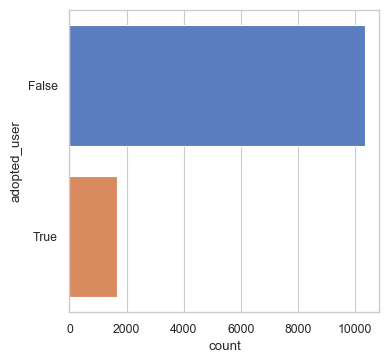

In [16]:
g = plt.figure(figsize=(4, 4), dpi=100)
g = sns.countplot(y='adopted_user', data=adopted_user)

## Load user data

In [17]:
# Determine unicode after getting UnicodeDecodeError assuming the default of  UTF-8
with open('data_raw_takehome_users.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [18]:
user_raw = pd.read_csv('data_raw_takehome_users.csv', encoding='ISO-8859-1')

## Asess user data

In [19]:
user_raw.shape

(12000, 10)

In [20]:
user_raw.head(50)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [21]:
user_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


## Explore user data

In [22]:
user_raw['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [23]:
user_raw['creation_source'].value_counts() 

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [24]:
user_raw.groupby('org_id')['object_id'].nunique()

org_id
0      319
1      233
2      201
3      168
4      159
      ... 
412     17
413     16
414     20
415     16
416      2
Name: object_id, Length: 417, dtype: int64

In [25]:
temp = user_raw['invited_by_user_id'].notnull().sum() / len(user_raw['invited_by_user_id'])
print('The percent of users invited is {}'.format(temp * 100))

The percent of users invited is 53.474999999999994


In [26]:
user_raw

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


## Prepare user data

Here, I clean up the user data and so some simple feature engineering.

In [27]:
user = user_raw.copy()

In [28]:
# Rename to 'user_id'
user = user.rename(columns={'object_id': 'user_id'})

# Set 'user_id' as index
user = user.set_index('user_id')

In [29]:
# Turn 'creation_time' into 'months_since_creation'
user['creation_time'] = pd.to_datetime(user['creation_time'])

# Assume today's date is 7/1/2014
NOW = pd.datetime(2014, 7, 1)
user['months_since_creation'] = (NOW - user['creation_time']) / np.timedelta64(1,'M')

# NOTE:  Drop original column of 'creation_time' after it's used in later function

In [30]:
# Dummy encode creation source, dropping 'Guest_invite' and adding columns back into table
user['creation_source'] = user['creation_source'].str.lower() 
dummies = pd.get_dummies(user['creation_source'],prefix='source', drop_first=False)
user = user.merge(dummies, left_index=True, right_index=True)

# Drop original column of 'creation_time'
user.drop(['creation_source'], axis=1, inplace=True)

In [31]:
# Drop orignal colum of 'name' as a feature 
user.drop(['name'], axis=1, inplace=True)

In [32]:
# Turn 'email' into simple features

# Extract top-level domain
tld = user['email'].str.split('@').str[1].str.split('.').str[1]
user['top_level_domain'] = tld 

# Categorize top-level domain
def categorize_tld(value_top_level_domain):
    tld_category = 0
    if value_top_level_domain == 'de':
        tld_category = 1
    return tld_category

# Create new column with the function
user['top_level_domain_category'] = user.apply(lambda x: categorize_tld(x['top_level_domain']), axis=1)

# Extract second-level domain
sld = user['email'].str.split('@').str[1].str.split('.').str[0]
user['second_level_domain'] = sld

# Categorize second-level domain
def categorize_sld(value_second_level_domain):
    major_personal_email_ls = ['gmail', 'yahoo', 'jourrapide', 'cuvox', 'gustr', 'hotmail']
    sld_category = 0
    if value_second_level_domain not in major_personal_email_ls:
        sld_category = 1
    return sld_category

# Create new column with the function
user['second_level_domain_category'] = user.apply(lambda x: categorize_sld(x['second_level_domain']), axis=1)


# Drop orignal columns as well as temp columns
user.drop(['email', 'top_level_domain', 'second_level_domain'], axis=1, inplace=True)

In [33]:
# Turn 'last_session_creation_time' into 'months_since_last_session'

# Convert last session from unix epoc time to datetime
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'], unit = "s") 

# Define function to calc months_since_last_sessoin
def calc_mo_since_last_session(value_last_session_creation_time, value_creation_time):
    NOW = pd.datetime(2014, 7, 1)
    if pd.isnull(value_last_session_creation_time):
        months_since_last_session = 100
    else:
        months_since_last_session = (NOW - value_last_session_creation_time) / np.timedelta64(1,'M')
    return months_since_last_session

# Create new column with the function
user['months_since_last_session'] = user.apply(lambda x: calc_mo_since_last_session(x['last_session_creation_time'], 
                                                                 x['creation_time']), axis=1)
# Drop original column with datetimes
user.drop(['creation_time'], axis=1, inplace=True)
user.drop(['last_session_creation_time'], axis=1, inplace=True)


# NOTE:  How best to encode, User never accessed?
# As accessed once:  months_since_last_session = (NOW - value_creation_time) / np.timedelta64(1,'M')
# As another value: = 100

In [34]:
# # Drop orignal column of 'org_id' as a feature 
# user.drop(['org_id'], axis=1, inplace=True)

In [35]:
# Convert 'invited_by_user_id' into 'invited'

# Define function to calc yes invited if there's invited_by_user_id
def invited(value_of_invited_by_user_id):
    is_invited = 1
    if pd.isnull(value_of_invited_by_user_id):
        is_invited = 0
    return is_invited

# Create new column with the function
user['invited'] = user.apply(lambda x: invited(x['invited_by_user_id']), axis=1)

# Drop orignal column of 'org_id' as a feature 
user.drop(['invited_by_user_id'], axis=1, inplace=True)

# Check 
assert user_raw['invited_by_user_id'].count() == user['invited'].sum()

In [36]:
user.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,months_since_creation,source_guest_invite,source_org_invite,source_personal_projects,source_signup,source_signup_google_auth,top_level_domain_category,second_level_domain_category,months_since_last_session,invited
user_id,,,,,,,,,,,,,
1,1,0,11,2.294514,1,0,0,0,0,0,0,2.294514,1
2,0,0,1,7.485778,0,1,0,0,0,0,0,3.017514,1
3,0,0,94,15.377116,0,1,0,0,0,0,0,15.377116,1
4,0,0,1,13.327915,1,0,0,0,0,0,0,13.295060,1
5,0,0,193,17.399072,1,0,0,0,0,0,0,17.234798,1


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
scaler.fit(user)
user_scaled = scaler.transform(user)

In [39]:
user

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,months_since_creation,source_guest_invite,source_org_invite,source_personal_projects,source_signup,source_signup_google_auth,top_level_domain_category,second_level_domain_category,months_since_last_session,invited
user_id,,,,,,,,,,,,,
1,1,0,11,2.294514,1,0,0,0,0,0,0,2.294514,1
2,0,0,1,7.485778,0,1,0,0,0,0,0,3.017514,1
3,0,0,94,15.377116,0,1,0,0,0,0,0,15.377116,1
4,0,0,1,13.327915,1,0,0,0,0,0,0,13.295060,1
5,0,0,193,17.399072,1,0,0,0,0,0,0,17.234798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,0,0,89,9.782217,0,1,0,0,0,0,0,9.782217,1
11997,0,0,200,17.617779,0,0,0,0,1,0,0,17.453504,0
11998,1,1,83,2.118107,1,0,0,0,0,1,0,2.118107,1


In [40]:
user_scaled2 = pd.DataFrame(data=user_scaled, columns=user.columns.tolist(), index=user.index.values)
user_scaled2

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,months_since_creation,source_guest_invite,source_org_invite,source_personal_projects,source_signup,source_signup_google_auth,top_level_domain_category,second_level_domain_category,months_since_last_session,invited
1,1.0,0.0,0.026442,0.053204,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015057,1.0
2,0.0,0.0,0.002404,0.269660,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.022345,1.0
3,0.0,0.0,0.225962,0.598698,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.146939,1.0
4,0.0,0.0,0.002404,0.513254,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125951,1.0
5,0.0,0.0,0.463942,0.683005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.165666,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,0.0,0.0,0.213942,0.365412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.090539,1.0
11997,0.0,0.0,0.480769,0.692124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.167871,0.0
11998,1.0,1.0,0.199519,0.045849,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.013279,1.0
11999,0.0,0.0,0.014423,0.999360,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.243144,0.0


## Further explore user data

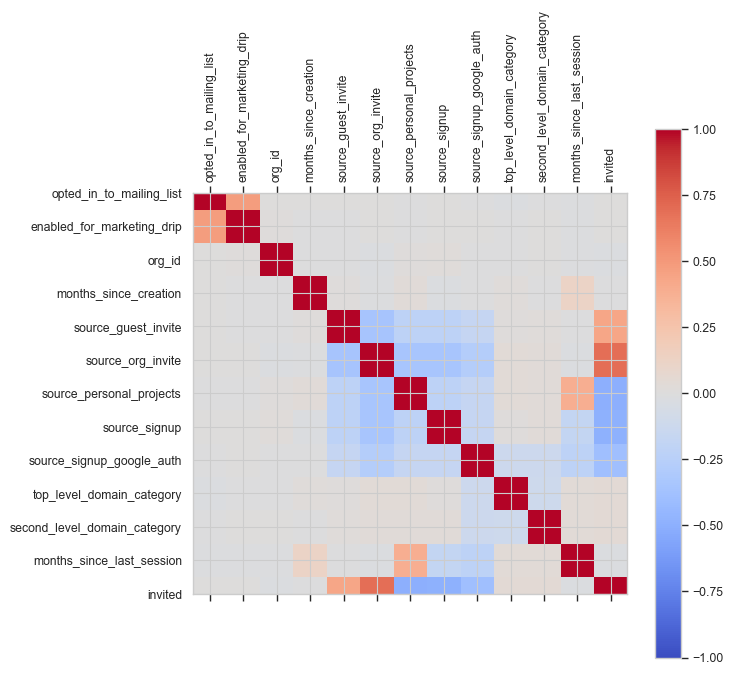

In [41]:
# Look at correlation between depdent variables
corr = user.corr()
fig = plt.figure(figsize=(7, 7), dpi=100)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(user.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(user.columns)
ax.set_yticklabels(user.columns)
plt.show()

## Model adopted users as a function of users using random forest

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [43]:
y = adopted_user
X = user_scaled

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
# Instantiate the model
rf_baseline=RandomForestClassifier(n_estimators=100, oob_score = True)

In [46]:
# Fit the model
rf_baseline.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(oob_score=True)

In [47]:
# Get summary of model
rf_baseline.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
# Predict with the model
y_pred=rf_baseline.predict(X_test)

In [49]:
# Score the model
acc = metrics.accuracy_score(y_test, y_pred)
print('The accuracy score is {}'.format(acc))

The accuracy score is 0.965


In [50]:
# View feature importance
feature_imp = pd.Series(rf_baseline.feature_importances_,index=user.columns.tolist()).sort_values(ascending=False)
feature_imp

months_since_last_session       0.676148
months_since_creation           0.215915
org_id                          0.077810
opted_in_to_mailing_list        0.005519
enabled_for_marketing_drip      0.004471
second_level_domain_category    0.003684
top_level_domain_category       0.003439
source_personal_projects        0.003304
source_guest_invite             0.002522
source_org_invite               0.002024
source_signup_google_auth       0.001781
source_signup                   0.001773
invited                         0.001609
dtype: float64

No handles with labels found to put in legend.


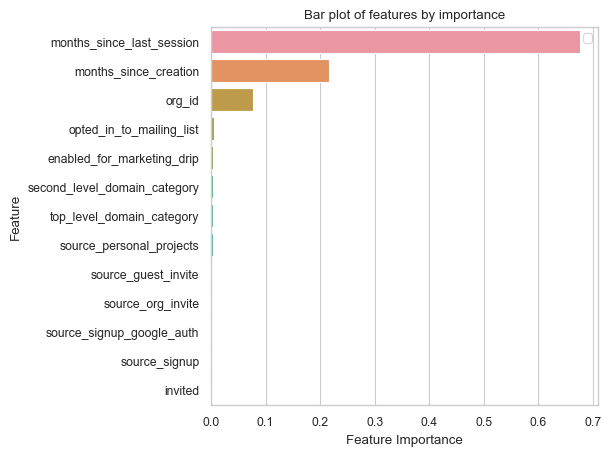

In [51]:
# Visualize feature importance
g = plt.figure(figsize=(5, 5), dpi=100)
g = sns.barplot(x=feature_imp, y=feature_imp.index)
g = plt.xlabel('Feature Importance')
g = plt.ylabel('Feature')
g = plt.title("Bar plot of features by importance")
g = plt.legend()

## Model adopted users from user with Logistic Regression

In [52]:
y = adopted_user
X = user_scaled2

In [53]:
# Drop most common 'source' dummy variable (i.e, 'org_invite') for logistic regresson
X.drop(['source_org_invite'], axis=1, inplace=True)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### User sklearn

In [55]:
logreg = LogisticRegression(fit_intercept = False)

In [56]:
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(fit_intercept=False)

In [57]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': False,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [64]:
print(logreg.coef_)

[[ 3.61356267e-02 -7.90028006e-03  4.67108682e-01  5.90513473e+00
   2.56065264e-01 -1.80725641e+00 -2.17978900e+00 -2.14898164e+00
  -6.92464687e-03  3.79933297e-02 -2.69745759e+01 -2.09156104e+00]]


In [59]:
y_pred = logreg.predict(X_test)

In [60]:
acc = metrics.accuracy_score(y_test, y_pred)
print('The accuracy score is {}'.format(acc))

The accuracy score is 0.9326666666666666


In [61]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[2580    0]
 [ 202  218]]


In [62]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


### Use statsmodels for clean coefficients

In [63]:
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.076314
         Iterations 14
                                  Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.809    
Dependent Variable:        adopted_user           AIC:                    1397.6538
Date:                      2020-07-17 08:00       BIC:                    1482.9135
No. Observations:          9000                   Log-Likelihood:         -686.83  
Df Model:                  11                     LL-Null:                -3600.8  
Df Residuals:              8988                   LLR p-value:            0.0000   
Converged:                 1.0000                 Scale:                  1.0000   
No. Iterations:            14.0000                                                 
-----------------------------------------------------------------------------------
                               Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
--------

Note:

* Very few of the p values are < .05